In [1]:
import polars as pl
import numpy as np
from datetime import datetime

# Declarando

In [2]:
num_filas = 5_000
rng = np.random.default_rng(seed=7)

datos_edificios = {
    "metraje" : rng.exponential(scale = 300, size=num_filas),
    "año": rng.integers(low=1980, high=2024, size= num_filas),
    "tipo": rng.choice(["A", "B", "C"], size = num_filas)
}

edificios = pl.DataFrame(data=datos_edificios)
edificios

metraje,año,tipo
f64,i64,str
212.258777,1982,"""C"""
307.561004,2019,"""C"""
170.564597,2007,"""A"""
268.532959,1988,"""A"""
61.959826,2006,"""A"""
…,…,…
213.130726,1993,"""C"""
122.661835,2003,"""C"""
17.268618,2018,"""C"""


Existen métodos para explorar datos, que muchos son similares a ```pandas```. Los tipos de datos son de ```pyarrow```.

In [3]:
edificios.schema

Schema([('metraje', Float64), ('año', Int64), ('tipo', String)])

In [4]:
edificios.head()

metraje,año,tipo
f64,i64,str
212.258777,1982,"""C"""
307.561004,2019,"""C"""
170.564597,2007,"""A"""
268.532959,1988,"""A"""
61.959826,2006,"""A"""


In [5]:
edificios.describe()

statistic,metraje,año,tipo
str,f64,f64,str
"""count""",5000.0,5000.0,"""5000"""
"""null_count""",0.0,0.0,"""0"""
"""mean""",298.228337,2001.5494,null
"""std""",304.992471,12.676312,null
"""min""",0.339977,1980.0,"""A"""
"""25%""",86.042265,1990.0,null
"""50%""",200.822089,2002.0,null
"""75%""",402.872935,2012.0,null
"""max""",2792.338175,2023.0,"""C"""


# Contexto y expresiones
Expresiones son las transformaciones que se hacen en las columnas de datos, incluyendo operaciones matemáticas, agregaciones, comparaciones, manipulación de texto, etc

Un contexto se refiere al ambiente específico en que una expresión es evaluada. Existen 3 contextos principales:
* **Selección**: Seleccionar columnas de un dataframe.
* **Filtro**: Reducir al dataframe extrayendo filas que cumplan una condición.
* **Agrupación**: Hacer resúmenes de subgrupos de los datos.

In [6]:
edificios.select("metraje")

metraje
f64
212.258777
307.561004
170.564597
268.532959
61.959826
…
213.130726
122.661835
17.268618


In [7]:
edificios.select(pl.col("metraje"))

metraje
f64
212.258777
307.561004
170.564597
268.532959
61.959826
…
213.130726
122.661835
17.268618


La segunda forma usando ```pl.col``` te permite encadenar manipulaciones en la columna, por ejemplo dividir el metraje por 100

In [8]:
edificios.select(pl.col("metraje").sort() / 100)

metraje
f64
0.0034
0.003456
0.004287
0.004316
0.004514
…
20.79575
21.742617
22.888708


Podemos también filtrar

In [9]:
edificios.filter(pl.col("año") > 2015)

metraje,año,tipo
f64,i64,str
307.561004,2019,"""C"""
1015.091205,2016,"""B"""
172.599827,2022,"""A"""
220.757182,2020,"""A"""
75.103604,2016,"""C"""
…,…,…
95.661883,2019,"""B"""
516.747999,2016,"""C"""
740.445452,2023,"""B"""


In [10]:
edificios.filter(pl.col("año") > 2015).select(pl.col("año").min())

año
i64
2016


Puedo hacer agrupaciones o ```group_by```

In [11]:
(edificios.group_by("tipo")
 .agg([
     pl.mean("metraje").round(1).alias("mts promedio"),
     pl.median("año").round(1).alias("año medio"),
     pl.len()
 ])
)

tipo,mts promedio,año medio,len
str,f64,f64,u32
"""B""",297.8,2002.0,1655
"""A""",296.9,2003.0,1653
"""C""",300.0,2002.0,1692


# Lazy API
Permite hacer operaciones sin correrlas inmediatamente, eso permite optimizarlas antes de ejecución y ver potenciales errores. Además permite hacer consultas en dataframes que no caben dentro de la memoria de manera más eficiente.

```LazyFrame``` es el objeto que se usa y existen diferentes formas de crearlos

In [12]:
# creamos variable precio
datos_edificios["precio"] = rng.exponential(scale=100_000_000, size = num_filas)

edificios_lazy = pl.LazyFrame(datos_edificios)
edificios_lazy

In [13]:
lazy_query = (
    edificios_lazy
    .with_columns(
        (pl.col("precio") / pl.col("metraje")).alias("precio_m2")
    )
    .filter(pl.col("precio_m2") > 100_000)
    .filter(pl.col("año") < 2010)
)
lazy_query

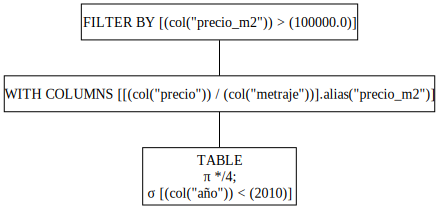

In [14]:
lazy_query.show_graph()

Esto explica que hace internamente ```polars``` para hacer la consulta.

Para ejecutarla se usa ```collect()```

In [15]:
(lazy_query.collect())

metraje,año,tipo,precio,precio_m2
f64,i64,str,f64,f64
212.258777,1982,"""C""",2.2064e7,103950.853854
170.564597,2007,"""A""",2.9574e7,173387.199516
61.959826,2006,"""A""",2.3924e8,3.8612e6
2.926088,1999,"""A""",2.0970e8,7.1666e7
842.764729,1994,"""B""",9.0218e7,107050.139414
…,…,…,…,…
27.066478,1998,"""B""",1.1429e8,4.2225e6
279.834009,1991,"""A""",1.1977e8,428018.490627
213.130726,1993,"""C""",3.7365e7,175316.233029


In [16]:
(lazy_query
 .collect()
 .select(pl.col(["precio_m2", "año"]))
)

precio_m2,año
f64,i64
103950.853854,1982
173387.199516,2007
3.8612e6,2006
7.1666e7,1999
107050.139414,1994
…,…
4.2225e6,1998
428018.490627,1991
175316.233029,1993


In [17]:
(lazy_query
 .collect()
 .select(pl.col(["precio_m2", "año"]))
 .describe()
)

statistic,precio_m2,año
str,f64,f64
"""count""",2678.0,2678.0
"""null_count""",0.0,0.0
"""mean""",3.4124e6,1994.714712
"""std""",2.4323e7,8.796034
"""min""",100027.263081,1980.0
"""25%""",241045.156977,1987.0
"""50%""",543350.608691,1995.0
"""75%""",1.4526e6,2003.0
"""max""",8.1156e8,2009.0


## Datos externos lazy
Tradicionalmente se leen todos los datos del csv o fuente externa antes de hacer cualquier procesamiento, pero con el formato lazy se minimiza lo que se lee y se procesa sólo cuando es necesario.

Ejemplo con datos de autos eléctricos yankis

In [18]:
# Bajando datos
import requests, pathlib

def bajar_archivo(file_url: str, local_file_path: pathlib.Path) -> None:
    response = requests.get(file_url)
    if response: 
        local_file_path.write_bytes(response.content)
        print (f"Archivo bajado en {local_file_path}")
    else:
        raise requests.exceptions.RequestException(f"Fallo en la descarga, código HTTP: {response.status_code}")

In [19]:
url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
nombre_archivo = "data/electric_cars.csv"
local_file_path = pathlib.Path(nombre_archivo)
if not local_file_path.exists():
    bajar_archivo(url, local_file_path)
else:
    print (f"Archivo {nombre_archivo} ya existe")

Archivo data/electric_cars.csv ya existe


In [20]:
lazy_car_data = pl.scan_csv(local_file_path)
lazy_car_data

In [21]:
lazy_car_data.schema

/var/folders/tx/knx9c43n5fd4_nn752k9dxs00000gn/T/ipykernel_1961/3946365031.py:1: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  lazy_car_data.schema


Schema([('VIN (1-10)', String),
        ('County', String),
        ('City', String),
        ('State', String),
        ('Postal Code', Int64),
        ('Model Year', Int64),
        ('Make', String),
        ('Model', String),
        ('Electric Vehicle Type', String),
        ('Clean Alternative Fuel Vehicle (CAFV) Eligibility', String),
        ('Electric Range', Int64),
        ('Base MSRP', Int64),
        ('Legislative District', Int64),
        ('DOL Vehicle ID', Int64),
        ('Vehicle Location', String),
        ('Electric Utility', String),
        ('2020 Census Tract', Int64)])

In [22]:
lazy_car_query = (
    lazy_car_data
    .filter((pl.col("Model Year") >= 2018))
    .filter(
        pl.col("Electric Vehicle Type") == "Battery Electric Vehicle (BEV)"
    )
    .group_by(["State", "Make"])
    .agg(
        pl.mean("Electric Range").alias("Average Electric Range"),
        pl.min("Model Year").alias("Oldest Model Year"),
        pl.len().alias("Number of Cars"),
    )
    .filter(pl.col("Average Electric Range") > 100)
    .filter(pl.col("Number of Cars") > 5)
    .sort(pl.col("Number of Cars"), descending=True)
)

lazy_car_query.collect()

State,Make,Average Electric Range,Oldest Model Year,Number of Cars
str,str,f64,i64,u32
"""WA""","""JAGUAR""",204.504202,2019,238
"""TX""","""TESLA""",113.923077,2018,13
"""FL""","""TESLA""",104.428571,2019,7


No se hace ningún cálculo pesado hasta que llamamos a ```collect()```

# Integraciones
## Fuentes de datos

In [23]:
import polars as pl

data = pl.DataFrame({
    "A": [1, 2, 3, 4, 5],
    "B": [6, 7, 8, 9, 10],
})

data.write_csv("data.csv")
data.write_ndjson("data.json")
data.write_parquet("data.parquet")

In [24]:
data_csv = pl.read_csv("data.csv")
data_csv_lazy = pl.scan_csv("data.csv")
data_csv_lazy.schema


/var/folders/tx/knx9c43n5fd4_nn752k9dxs00000gn/T/ipykernel_1961/2993282625.py:3: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  data_csv_lazy.schema


Schema([('A', Int64), ('B', Int64)])

In [25]:
data_json = pl.read_ndjson("data.json")
data_json_lazy = pl.scan_ndjson("data.json")
data_json_lazy.schema

/var/folders/tx/knx9c43n5fd4_nn752k9dxs00000gn/T/ipykernel_1961/32618361.py:3: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  data_json_lazy.schema


Schema([('A', Int64), ('B', Int64)])

In [26]:
data_parquet = pl.read_parquet("data.parquet")
data_parquet_lazy = pl.scan_parquet("data.parquet")
data_parquet_lazy.schema


/var/folders/tx/knx9c43n5fd4_nn752k9dxs00000gn/T/ipykernel_1961/1889960607.py:3: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  data_parquet_lazy.schema


Schema([('A', Int64), ('B', Int64)])

## Objetos python

In [27]:
import numpy as np
import pandas as pd
import polars as pl

polars_data = pl.DataFrame({
    "A": [1, 2, 3, 4, 5],
    "B": [6, 7, 8, 9, 10]
})

pandas_data = pd.DataFrame({
    "A": [1, 2, 3, 4, 5],
    "B": [6, 7, 8, 9, 10]
})

numpy_data = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10]
]).T

In [28]:
pl.from_pandas(pandas_data)

A,B
i64,i64
1,6
2,7
3,8
4,9
5,10


In [29]:
pl.from_numpy(numpy_data)

column_0,column_1
i64,i64
1,6
2,7
3,8
4,9
5,10


In [30]:
pl.from_numpy(numpy_data, schema={"A": pl.Int16, "B": pl.Int16})

A,B
i16,i16
1,6
2,7
3,8
4,9
5,10


In [31]:
polars_data.to_pandas()

,A,B
0,1,6
1,2,7
2,3,8
3,4,9
4,5,10


In [32]:
polars_data.to_numpy()

array([[ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10]])

# Joins
## Inner
Produce un DataFrame que contiene solo las filas donde la clave de unión existe en ambos DataFrames.

In [33]:
df_customers = pl.DataFrame(
    {
        "customer_id": [1, 2, 3],
        "name": ["Alice", "Bob", "Charlie"],
    }
)
print(df_customers)

shape: (3, 2)
┌─────────────┬─────────┐
│ customer_id ┆ name    │
│ ---         ┆ ---     │
│ i64         ┆ str     │
╞═════════════╪═════════╡
│ 1           ┆ Alice   │
│ 2           ┆ Bob     │
│ 3           ┆ Charlie │
└─────────────┴─────────┘


In [34]:
df_orders = pl.DataFrame(
    {
        "order_id": ["a", "b", "c"],
        "customer_id": [1, 2, 2],
        "amount": [100, 200, 300],
    }
)
print(df_orders)

shape: (3, 3)
┌──────────┬─────────────┬────────┐
│ order_id ┆ customer_id ┆ amount │
│ ---      ┆ ---         ┆ ---    │
│ str      ┆ i64         ┆ i64    │
╞══════════╪═════════════╪════════╡
│ a        ┆ 1           ┆ 100    │
│ b        ┆ 2           ┆ 200    │
│ c        ┆ 2           ┆ 300    │
└──────────┴─────────────┴────────┘


In [35]:
df_customers.join(df_orders, on="customer_id", how="inner")

customer_id,name,order_id,amount
i64,str,str,i64
1,"""Alice""","""a""",100
2,"""Bob""","""b""",200
2,"""Bob""","""c""",300


## Left (outer) join
Produce un DataFrame que contiene todas las filas del DataFrame de la izquierda y solo las filas del DataFrame de la derecha donde la clave de unión existe en el DataFrame de la izquierda. Si tomamos el ejemplo anterior y queremos obtener un DataFrame con todos los clientes y sus pedidos asociados (independientemente de si han realizado un pedido o no), podemos hacer una unión izquierda:

In [36]:
df_customers.join(df_orders, on="customer_id", how="left")

customer_id,name,order_id,amount
i64,str,str,i64
1,"""Alice""","""a""",100
2,"""Bob""","""b""",200
2,"""Bob""","""c""",300
3,"""Charlie""",null,null


## Right (outer) join

In [37]:
df_orders.join(df_customers, on="customer_id", how="right")

order_id,amount,customer_id,name
str,i64,i64,str
"""a""",100,1,"""Alice"""
"""b""",200,2,"""Bob"""
"""c""",300,2,"""Bob"""
null,null,3,"""Charlie"""


## Outer join
Produce un DataFrame que contiene todas las filas de ambos DataFrames. Las columnas son nulas si la clave de unión no existe en el DataFrame de origen. Realizar una unión externa completa en los dos DataFrames anteriores produce un DataFrame similar a la unión izquierda:

In [38]:
df_customers.join(df_orders, on="customer_id", how="full")

customer_id,name,order_id,customer_id_right,amount
i64,str,str,i64,i64
1,"""Alice""","""a""",1,100
2,"""Bob""","""b""",2,200
2,"""Bob""","""c""",2,300
3,"""Charlie""",null,null,null


In [39]:
df_customers.join(
    df_orders, on="customer_id", how="full", coalesce=True
)

customer_id,name,order_id,amount
i64,str,str,i64
1,"""Alice""","""a""",100
2,"""Bob""","""b""",200
2,"""Bob""","""c""",300
3,"""Charlie""",null,null


## Cross join

In [40]:
df_colors = pl.DataFrame(
    {
        "color": ["red", "blue", "green"],
    }
)
df_colors

color
str
"""red"""
"""blue"""
"""green"""


In [41]:
df_sizes = pl.DataFrame(
    {
        "size": ["S", "M", "L"],
    }
)
df_sizes

size
str
"""S"""
"""M"""
"""L"""


In [42]:
df_colors.join(df_sizes, how="cross")

color,size
str,str
"""red""","""S"""
"""red""","""M"""
"""red""","""L"""
"""blue""","""S"""
"""blue""","""M"""
"""blue""","""L"""
"""green""","""S"""
"""green""","""M"""
"""green""","""L"""


## Semi join
Devuelve todas las filas del DataFrame de la izquierda en las que la clave de unión también está presente en el DataFrame de la derecha. Considera el siguiente escenario: una empresa de alquiler de autos tiene un DataFrame que muestra los autos que posee, donde cada auto tiene un ID único.

In [43]:
df_cars = pl.DataFrame(
    {
        "id": ["a", "b", "c"],
        "make": ["ford", "toyota", "bmw"],
    }
)
df_cars

id,make
str,str
"""a""","""ford"""
"""b""","""toyota"""
"""c""","""bmw"""


In [44]:
df_repairs = pl.DataFrame(
    {
        "id": ["c", "c"],
        "cost": [100, 200],
    }
)
df_repairs

id,cost
str,i64
"""c""",100
"""c""",200


Quieres responder a esta pregunta: ¿cuáles de los autos han tenido reparaciones realizadas?

Una inner join no responde directamente a esta pregunta, ya que produce un DataFrame con múltiples filas para cada auto que ha tenido múltiples trabajos de reparación.

In [45]:
df_cars.join(df_repairs, on="id", how="inner")

id,make,cost
str,str,i64
"""c""","""bmw""",100
"""c""","""bmw""",200


In [46]:
df_cars.join(df_repairs, on="id", how="semi")

id,make
str,str
"""c""","""bmw"""


## Anti join
Continuando con este ejemplo, una pregunta alternativa podría ser: ¿cuáles de los autos no han tenido un trabajo de reparación realizado? Una unión anti produce un DataFrame que muestra todos los autos de df_cars donde el ID no está presente en el DataFrame df_repairs.

In [47]:
df_cars.join(df_repairs, on="id", how="anti")

id,make
str,str
"""a""","""ford"""
"""b""","""toyota"""


## Asof join
Es similar a una left join, excepto que se empareja con la clave más cercana en lugar de claves iguales. En Polars, podemos hacer una unión “asof” con el método join_asof.

Considera el siguiente escenario: un corredor de bolsa tiene un DataFrame llamado df_trades que muestra las transacciones que ha realizado para diferentes acciones.

In [48]:
df_trades = pl.DataFrame(
    {
        "time": [
            datetime(2020, 1, 1, 9, 1, 0),
            datetime(2020, 1, 1, 9, 1, 0),
            datetime(2020, 1, 1, 9, 3, 0),
            datetime(2020, 1, 1, 9, 6, 0),
        ],
        "stock": ["A", "B", "B", "C"],
        "trade": [101, 299, 301, 500],
    }
)
df_trades

time,stock,trade
datetime[μs],str,i64
2020-01-01 09:01:00,"""A""",101
2020-01-01 09:01:00,"""B""",299
2020-01-01 09:03:00,"""B""",301
2020-01-01 09:06:00,"""C""",500


El corredor de bolsa tiene otro DataFrame llamado df_quotes que muestra los precios que ha cotizado para estas acciones.

In [49]:
df_quotes = pl.DataFrame(
    {
        "time": [
            datetime(2020, 1, 1, 9, 0, 0),
            datetime(2020, 1, 1, 9, 2, 0),
            datetime(2020, 1, 1, 9, 4, 0),
            datetime(2020, 1, 1, 9, 6, 0),
        ],
        "stock": ["A", "B", "C", "A"],
        "quote": [100, 300, 501, 102],
    }
)
df_quotes

time,stock,quote
datetime[μs],str,i64
2020-01-01 09:00:00,"""A""",100
2020-01-01 09:02:00,"""B""",300
2020-01-01 09:04:00,"""C""",501
2020-01-01 09:06:00,"""A""",102


Queremos producir un DataFrame que muestre, para cada transacción, la cotización más reciente proporcionada antes de la transacción. Haces esto con join_asof (usando la estrategia predeterminada strategy="backward"). Para evitar unir transacciones de una acción con una cotización de otra, debes especificar una unión preliminar exacta en la columna de acciones con by="stock".

In [50]:
df_trades.join_asof(df_quotes, on="time", by="stock")

time,stock,trade,quote
datetime[μs],str,i64,i64
2020-01-01 09:01:00,"""A""",101,100
2020-01-01 09:01:00,"""B""",299,null
2020-01-01 09:03:00,"""B""",301,300
2020-01-01 09:06:00,"""C""",500,501


Si queremos asegurar de que solo se unan las cotizaciones dentro de un cierto rango de tiempo a las transacciones, especificamos el argumento tolerance. En este caso, queremos asegurarnos de que la última cotización anterior esté dentro de 1 minuto de la transacción, por lo que establecemos tolerance = "1m".

In [51]:
df_trades.join_asof(
    df_quotes, on="time", by="stock", tolerance="1m"
)

time,stock,trade,quote
datetime[μs],str,i64,i64
2020-01-01 09:01:00,"""A""",101,100
2020-01-01 09:01:00,"""B""",299,null
2020-01-01 09:03:00,"""B""",301,300
2020-01-01 09:06:00,"""C""",500,null


# Concatenación
## Vertical
La concatenación vertical falla cuando los DataFrames no tienen los mismos nombres de columnas.

In [52]:
df_v1 = pl.DataFrame(
    {
        "a": [1],
        "b": [3],
    }
)
df_v2 = pl.DataFrame(
    {
        "a": [2],
        "b": [4],
    }
)
df_v1, df_v2

(shape: (1, 2)
 ┌─────┬─────┐
 │ a   ┆ b   │
 │ --- ┆ --- │
 │ i64 ┆ i64 │
 ╞═════╪═════╡
 │ 1   ┆ 3   │
 └─────┴─────┘,
 shape: (1, 2)
 ┌─────┬─────┐
 │ a   ┆ b   │
 │ --- ┆ --- │
 │ i64 ┆ i64 │
 ╞═════╪═════╡
 │ 2   ┆ 4   │
 └─────┴─────┘)

In [53]:
df_vertical_concat = pl.concat(
    [
        df_v1,
        df_v2,
    ],
    how="vertical",
)
print(df_vertical_concat)

shape: (2, 2)
┌─────┬─────┐
│ a   ┆ b   │
│ --- ┆ --- │
│ i64 ┆ i64 │
╞═════╪═════╡
│ 1   ┆ 3   │
│ 2   ┆ 4   │
└─────┴─────┘


## Horizontal
La concatenación horizontal falla cuando los DataFrames tienen columnas que se superponen.

In [54]:
df_h1 = pl.DataFrame(
    {
        "l1": [1, 2],
        "l2": [3, 4],
    }
)
df_h2 = pl.DataFrame(
    {
        "r1": [5, 6],
        "r2": [7, 8],
        "r3": [9, 10],
    }
)

In [55]:
df_h1, df_h2

(shape: (2, 2)
 ┌─────┬─────┐
 │ l1  ┆ l2  │
 │ --- ┆ --- │
 │ i64 ┆ i64 │
 ╞═════╪═════╡
 │ 1   ┆ 3   │
 │ 2   ┆ 4   │
 └─────┴─────┘,
 shape: (2, 3)
 ┌─────┬─────┬─────┐
 │ r1  ┆ r2  ┆ r3  │
 │ --- ┆ --- ┆ --- │
 │ i64 ┆ i64 ┆ i64 │
 ╞═════╪═════╪═════╡
 │ 5   ┆ 7   ┆ 9   │
 │ 6   ┆ 8   ┆ 10  │
 └─────┴─────┴─────┘)

In [56]:
df_horizontal_concat = pl.concat(
    [
        df_h1,
        df_h2,
    ],
    how="horizontal",
)
print(df_horizontal_concat)

shape: (2, 5)
┌─────┬─────┬─────┬─────┬─────┐
│ l1  ┆ l2  ┆ r1  ┆ r2  ┆ r3  │
│ --- ┆ --- ┆ --- ┆ --- ┆ --- │
│ i64 ┆ i64 ┆ i64 ┆ i64 ┆ i64 │
╞═════╪═════╪═════╪═════╪═════╡
│ 1   ┆ 3   ┆ 5   ┆ 7   ┆ 9   │
│ 2   ┆ 4   ┆ 6   ┆ 8   ┆ 10  │
└─────┴─────┴─────┴─────┴─────┘


Cuando los DataFrames tienen un número diferente de filas, las columnas se rellenarán con valores nulos al final hasta alcanzar la longitud máxima.

In [57]:
df_h1 = pl.DataFrame(
    {
        "l1": [1, 2],
        "l2": [3, 4],
    }
)
df_h2 = pl.DataFrame(
    {
        "r1": [5, 6, 7],
        "r2": [8, 9, 10],
    }
)
df_horizontal_concat = pl.concat(
    [
        df_h1,
        df_h2,
    ],
    how="horizontal",
)
print(df_horizontal_concat)

shape: (3, 4)
┌──────┬──────┬─────┬─────┐
│ l1   ┆ l2   ┆ r1  ┆ r2  │
│ ---  ┆ ---  ┆ --- ┆ --- │
│ i64  ┆ i64  ┆ i64 ┆ i64 │
╞══════╪══════╪═════╪═════╡
│ 1    ┆ 3    ┆ 5   ┆ 8   │
│ 2    ┆ 4    ┆ 6   ┆ 9   │
│ null ┆ null ┆ 7   ┆ 10  │
└──────┴──────┴─────┴─────┘


## Diagonal
En una concatenación diagonal, combinas todas las filas y columnas de una lista de DataFrames en un solo DataFrame más largo y/o más ancho.

In [58]:
df_d1 = pl.DataFrame(
    {
        "a": [1],
        "b": [3],
    }
)
df_d2 = pl.DataFrame(
    {
        "a": [2],
        "d": [4],
    }
)


In [59]:
df_d1, df_d2

(shape: (1, 2)
 ┌─────┬─────┐
 │ a   ┆ b   │
 │ --- ┆ --- │
 │ i64 ┆ i64 │
 ╞═════╪═════╡
 │ 1   ┆ 3   │
 └─────┴─────┘,
 shape: (1, 2)
 ┌─────┬─────┐
 │ a   ┆ d   │
 │ --- ┆ --- │
 │ i64 ┆ i64 │
 ╞═════╪═════╡
 │ 2   ┆ 4   │
 └─────┴─────┘)

In [60]:
df_diagonal_concat = pl.concat(
    [
        df_d1,
        df_d2,
    ],
    how="diagonal",
)
print(df_diagonal_concat)

shape: (2, 3)
┌─────┬──────┬──────┐
│ a   ┆ b    ┆ d    │
│ --- ┆ ---  ┆ ---  │
│ i64 ┆ i64  ┆ i64  │
╞═════╪══════╪══════╡
│ 1   ┆ 3    ┆ null │
│ 2   ┆ null ┆ 4    │
└─────┴──────┴──────┘


# Pivotes
La operación de pivoteo consiste en agrupar por una o varias columnas (estas serán el nuevo eje y), la columna que se pivotará (esta será el nuevo eje x) y una agregación.

In [61]:
df = pl.DataFrame(
    {
        "foo": ["A", "A", "B", "B", "C"],
        "N": [1, 2, 2, 4, 2],
        "bar": ["k", "l", "m", "n", "o"],
    }
)
print(df)

shape: (5, 3)
┌─────┬─────┬─────┐
│ foo ┆ N   ┆ bar │
│ --- ┆ --- ┆ --- │
│ str ┆ i64 ┆ str │
╞═════╪═════╪═════╡
│ A   ┆ 1   ┆ k   │
│ A   ┆ 2   ┆ l   │
│ B   ┆ 2   ┆ m   │
│ B   ┆ 4   ┆ n   │
│ C   ┆ 2   ┆ o   │
└─────┴─────┴─────┘


## Eager (Pivot)

In [62]:
out = df.pivot("bar", index="foo", values="N", aggregate_function="first")
print(out)

shape: (3, 6)
┌─────┬──────┬──────┬──────┬──────┬──────┐
│ foo ┆ k    ┆ l    ┆ m    ┆ n    ┆ o    │
│ --- ┆ ---  ┆ ---  ┆ ---  ┆ ---  ┆ ---  │
│ str ┆ i64  ┆ i64  ┆ i64  ┆ i64  ┆ i64  │
╞═════╪══════╪══════╪══════╪══════╪══════╡
│ A   ┆ 1    ┆ 2    ┆ null ┆ null ┆ null │
│ B   ┆ null ┆ null ┆ 2    ┆ 4    ┆ null │
│ C   ┆ null ┆ null ┆ null ┆ null ┆ 2    │
└─────┴──────┴──────┴──────┴──────┴──────┘


## Lazy
Un LazyFrame en Polars siempre necesita conocer el esquema de manera estática (antes de recolectar la consulta). Dado que el esquema de salida de un pivote depende de los datos, es imposible determinar el esquema sin ejecutar la consulta.

In [63]:
q = (
    df.lazy()
    .collect()
    .pivot(index="foo", on="bar", values="N", aggregate_function="first")
    .lazy()
)
out = q.collect()
print(out)

shape: (3, 6)
┌─────┬──────┬──────┬──────┬──────┬──────┐
│ foo ┆ k    ┆ l    ┆ m    ┆ n    ┆ o    │
│ --- ┆ ---  ┆ ---  ┆ ---  ┆ ---  ┆ ---  │
│ str ┆ i64  ┆ i64  ┆ i64  ┆ i64  ┆ i64  │
╞═════╪══════╪══════╪══════╪══════╪══════╡
│ A   ┆ 1    ┆ 2    ┆ null ┆ null ┆ null │
│ B   ┆ null ┆ null ┆ 2    ┆ 4    ┆ null │
│ C   ┆ null ┆ null ┆ null ┆ null ┆ 2    │
└─────┴──────┴──────┴──────┴──────┴──────┘


# Unpivot

In [64]:
df = pl.DataFrame(
    {
        "A": ["a", "b", "a"],
        "B": [1, 3, 5],
        "C": [10, 11, 12],
        "D": [2, 4, 6],
    }
)
print(df)

shape: (3, 4)
┌─────┬─────┬─────┬─────┐
│ A   ┆ B   ┆ C   ┆ D   │
│ --- ┆ --- ┆ --- ┆ --- │
│ str ┆ i64 ┆ i64 ┆ i64 │
╞═════╪═════╪═════╪═════╡
│ a   ┆ 1   ┆ 10  ┆ 2   │
│ b   ┆ 3   ┆ 11  ┆ 4   │
│ a   ┆ 5   ┆ 12  ┆ 6   │
└─────┴─────┴─────┴─────┘


## Eager y Lazy
Tienen la misma API

In [65]:
out = df.unpivot(["C", "D"], index=["A", "B"])
print(out)

shape: (6, 4)
┌─────┬─────┬──────────┬───────┐
│ A   ┆ B   ┆ variable ┆ value │
│ --- ┆ --- ┆ ---      ┆ ---   │
│ str ┆ i64 ┆ str      ┆ i64   │
╞═════╪═════╪══════════╪═══════╡
│ a   ┆ 1   ┆ C        ┆ 10    │
│ b   ┆ 3   ┆ C        ┆ 11    │
│ a   ┆ 5   ┆ C        ┆ 12    │
│ a   ┆ 1   ┆ D        ┆ 2     │
│ b   ┆ 3   ┆ D        ┆ 4     │
│ a   ┆ 5   ┆ D        ┆ 6     │
└─────┴─────┴──────────┴───────┘


# Series de tiempo
## Parsing (lectura?)
### Tipos de datos
Polars tiene los siguientes tipos de datos para fechas y horas:

	•	Date: Representación de fecha, por ejemplo, 2014-07-08. Internamente se representa como días desde la época UNIX, codificados por un entero con signo de 32 bits.
	•	Datetime: Representación de fecha y hora, por ejemplo, 2014-07-08 07:00:00. Internamente se representa como un entero de 64 bits desde la época Unix y puede tener diferentes unidades como ns, us, ms.
	•	Duration: Un tipo de diferencia de tiempo que se crea al restar Date/Datetime. Similar a timedelta en Python.
	•	Time: Representación de tiempo, internamente representada como nanosegundos desde la medianoche.

### Desde archivo

In [66]:
archivo = "data/apple_stock_data.csv"
df = pl.read_csv(archivo, try_parse_dates=True)
print(df)

shape: (6_953, 7)
┌────────────┬────────┬────────┬────────┬────────┬──────────┬───────────┐
│ Date       ┆ Open   ┆ High   ┆ Low    ┆ Close  ┆ Volume   ┆ Adj Close │
│ ---        ┆ ---    ┆ ---    ┆ ---    ┆ ---    ┆ ---      ┆ ---       │
│ date       ┆ f64    ┆ f64    ┆ f64    ┆ f64    ┆ i64      ┆ f64       │
╞════════════╪════════╪════════╪════════╪════════╪══════════╪═══════════╡
│ 2012-03-30 ┆ 608.77 ┆ 610.56 ┆ 597.94 ┆ 599.55 ┆ 26050900 ┆ 599.55    │
│ 2012-03-29 ┆ 612.78 ┆ 616.56 ┆ 607.23 ┆ 609.86 ┆ 21668300 ┆ 609.86    │
│ 2012-03-28 ┆ 618.38 ┆ 621.45 ┆ 610.31 ┆ 617.62 ┆ 23385200 ┆ 617.62    │
│ 2012-03-27 ┆ 606.18 ┆ 616.28 ┆ 606.06 ┆ 614.48 ┆ 21628200 ┆ 614.48    │
│ 2012-03-26 ┆ 599.79 ┆ 607.15 ┆ 595.26 ┆ 606.98 ┆ 21259900 ┆ 606.98    │
│ …          ┆ …      ┆ …      ┆ …      ┆ …      ┆ …        ┆ …         │
│ 1984-09-13 ┆ 27.5   ┆ 27.62  ┆ 27.5   ┆ 27.5   ┆ 7429600  ┆ 3.14      │
│ 1984-09-12 ┆ 26.87  ┆ 27.0   ┆ 26.12  ┆ 26.12  ┆ 4773600  ┆ 2.98      │
│ 1984-09-11 ┆ 26.62

### Texto a fechas

In [67]:
df = pl.read_csv(archivo, try_parse_dates=False)

df = df.with_columns(pl.col("Date").str.to_date("%Y-%m-%d"))
print(df)

shape: (6_953, 7)
┌────────────┬────────┬────────┬────────┬────────┬──────────┬───────────┐
│ Date       ┆ Open   ┆ High   ┆ Low    ┆ Close  ┆ Volume   ┆ Adj Close │
│ ---        ┆ ---    ┆ ---    ┆ ---    ┆ ---    ┆ ---      ┆ ---       │
│ date       ┆ f64    ┆ f64    ┆ f64    ┆ f64    ┆ i64      ┆ f64       │
╞════════════╪════════╪════════╪════════╪════════╪══════════╪═══════════╡
│ 2012-03-30 ┆ 608.77 ┆ 610.56 ┆ 597.94 ┆ 599.55 ┆ 26050900 ┆ 599.55    │
│ 2012-03-29 ┆ 612.78 ┆ 616.56 ┆ 607.23 ┆ 609.86 ┆ 21668300 ┆ 609.86    │
│ 2012-03-28 ┆ 618.38 ┆ 621.45 ┆ 610.31 ┆ 617.62 ┆ 23385200 ┆ 617.62    │
│ 2012-03-27 ┆ 606.18 ┆ 616.28 ┆ 606.06 ┆ 614.48 ┆ 21628200 ┆ 614.48    │
│ 2012-03-26 ┆ 599.79 ┆ 607.15 ┆ 595.26 ┆ 606.98 ┆ 21259900 ┆ 606.98    │
│ …          ┆ …      ┆ …      ┆ …      ┆ …      ┆ …        ┆ …         │
│ 1984-09-13 ┆ 27.5   ┆ 27.62  ┆ 27.5   ┆ 27.5   ┆ 7429600  ┆ 3.14      │
│ 1984-09-12 ┆ 26.87  ┆ 27.0   ┆ 26.12  ┆ 26.12  ┆ 4773600  ┆ 2.98      │
│ 1984-09-11 ┆ 26.62

### Extraer características de fecha

In [68]:
df_with_year = df.with_columns(pl.col("Date").dt.year().alias("year"))
print(df_with_year)

shape: (6_953, 8)
┌────────────┬────────┬────────┬────────┬────────┬──────────┬───────────┬──────┐
│ Date       ┆ Open   ┆ High   ┆ Low    ┆ Close  ┆ Volume   ┆ Adj Close ┆ year │
│ ---        ┆ ---    ┆ ---    ┆ ---    ┆ ---    ┆ ---      ┆ ---       ┆ ---  │
│ date       ┆ f64    ┆ f64    ┆ f64    ┆ f64    ┆ i64      ┆ f64       ┆ i32  │
╞════════════╪════════╪════════╪════════╪════════╪══════════╪═══════════╪══════╡
│ 2012-03-30 ┆ 608.77 ┆ 610.56 ┆ 597.94 ┆ 599.55 ┆ 26050900 ┆ 599.55    ┆ 2012 │
│ 2012-03-29 ┆ 612.78 ┆ 616.56 ┆ 607.23 ┆ 609.86 ┆ 21668300 ┆ 609.86    ┆ 2012 │
│ 2012-03-28 ┆ 618.38 ┆ 621.45 ┆ 610.31 ┆ 617.62 ┆ 23385200 ┆ 617.62    ┆ 2012 │
│ 2012-03-27 ┆ 606.18 ┆ 616.28 ┆ 606.06 ┆ 614.48 ┆ 21628200 ┆ 614.48    ┆ 2012 │
│ 2012-03-26 ┆ 599.79 ┆ 607.15 ┆ 595.26 ┆ 606.98 ┆ 21259900 ┆ 606.98    ┆ 2012 │
│ …          ┆ …      ┆ …      ┆ …      ┆ …      ┆ …        ┆ …         ┆ …    │
│ 1984-09-13 ┆ 27.5   ┆ 27.62  ┆ 27.5   ┆ 27.5   ┆ 7429600  ┆ 3.14      ┆ 1984 │
│ 1984-09-

### Zonas horarias mezcladas


In [69]:
data = [
    "2021-03-27T00:00:00+0100",
    "2021-03-28T00:00:00+0100",
    "2021-03-29T00:00:00+0200",
    "2021-03-30T00:00:00+0200",
]
mixed_parsed = (
    pl.Series(data)
    .str.to_datetime("%Y-%m-%dT%H:%M:%S%z")
    .dt.convert_time_zone("America/Santiago")
)
print(mixed_parsed)

shape: (4,)
Series: '' [datetime[μs, America/Santiago]]
[
	2021-03-26 20:00:00 -03
	2021-03-27 20:00:00 -03
	2021-03-28 19:00:00 -03
	2021-03-29 19:00:00 -03
]


## Filtro

In [70]:
df = df.select("Date", "Close")
df

Date,Close
date,f64
2012-03-30,599.55
2012-03-29,609.86
2012-03-28,617.62
2012-03-27,614.48
2012-03-26,606.98
…,…
1984-09-13,27.5
1984-09-12,26.12
1984-09-11,26.87


### Fecha única

In [71]:
filtered_df = df.filter(
    pl.col("Date") == datetime(1995, 10, 16),
)
print(filtered_df)

shape: (1, 2)
┌────────────┬───────┐
│ Date       ┆ Close │
│ ---        ┆ ---   │
│ date       ┆ f64   │
╞════════════╪═══════╡
│ 1995-10-16 ┆ 36.13 │
└────────────┴───────┘


### Rango de fechas

In [72]:
filtered_range_df = df.filter(
    pl.col("Date").is_between(datetime(1995, 7, 1), datetime(1995, 11, 1)),
)
print(filtered_range_df)


shape: (86, 2)
┌────────────┬───────┐
│ Date       ┆ Close │
│ ---        ┆ ---   │
│ date       ┆ f64   │
╞════════════╪═══════╡
│ 1995-11-01 ┆ 36.63 │
│ 1995-10-31 ┆ 36.31 │
│ 1995-10-30 ┆ 35.25 │
│ 1995-10-27 ┆ 34.75 │
│ 1995-10-26 ┆ 34.88 │
│ …          ┆ …     │
│ 1995-07-10 ┆ 48.63 │
│ 1995-07-07 ┆ 48.63 │
│ 1995-07-06 ┆ 47.0  │
│ 1995-07-05 ┆ 46.5  │
│ 1995-07-03 ┆ 46.94 │
└────────────┴───────┘


### Fechas negativas

In [73]:
ts = pl.Series(["-1300-05-23", "-1400-03-02"]).str.to_date()

negative_dates_df = pl.DataFrame({"ts": ts, "values": [3, 4]})

negative_dates_filtered_df = negative_dates_df.filter(pl.col("ts").dt.year() < -1300)
print(negative_dates_filtered_df)

shape: (1, 2)
┌─────────────┬────────┐
│ ts          ┆ values │
│ ---         ┆ ---    │
│ date        ┆ i64    │
╞═════════════╪════════╡
│ -1400-03-02 ┆ 4      │
└─────────────┴────────┘


## Agrupaciones

### Ventana fija
Las fechas deben ser  ordenadas en orden ascendente; si no están ordenadas de esta manera, la salida de group_by_dynamic no será correcta

In [74]:
df = df.sort("Date")
print(df)

shape: (6_953, 2)
┌────────────┬────────┐
│ Date       ┆ Close  │
│ ---        ┆ ---    │
│ date       ┆ f64    │
╞════════════╪════════╡
│ 1984-09-07 ┆ 26.5   │
│ 1984-09-10 ┆ 26.37  │
│ 1984-09-11 ┆ 26.87  │
│ 1984-09-12 ┆ 26.12  │
│ 1984-09-13 ┆ 27.5   │
│ …          ┆ …      │
│ 2012-03-26 ┆ 606.98 │
│ 2012-03-27 ┆ 614.48 │
│ 2012-03-28 ┆ 617.62 │
│ 2012-03-29 ┆ 609.86 │
│ 2012-03-30 ┆ 599.55 │
└────────────┴────────┘


In [75]:
annual_average_df = df.group_by_dynamic("Date", every="1y").agg(pl.col("Close").mean())

df_with_year = annual_average_df.with_columns(pl.col("Date").dt.year().alias("year"))
print(df_with_year)

shape: (29, 3)
┌────────────┬────────────┬──────┐
│ Date       ┆ Close      ┆ year │
│ ---        ┆ ---        ┆ ---  │
│ date       ┆ f64        ┆ i32  │
╞════════════╪════════════╪══════╡
│ 1984-01-01 ┆ 25.578625  ┆ 1984 │
│ 1985-01-01 ┆ 20.193676  ┆ 1985 │
│ 1986-01-01 ┆ 32.461028  ┆ 1986 │
│ 1987-01-01 ┆ 53.889684  ┆ 1987 │
│ 1988-01-01 ┆ 41.540079  ┆ 1988 │
│ …          ┆ …          ┆ …    │
│ 2008-01-01 ┆ 141.979012 ┆ 2008 │
│ 2009-01-01 ┆ 146.814127 ┆ 2009 │
│ 2010-01-01 ┆ 259.84246  ┆ 2010 │
│ 2011-01-01 ┆ 364.004325 ┆ 2011 │
│ 2012-01-01 ┆ 503.679839 ┆ 2012 │
└────────────┴────────────┴──────┘


### group_by dinamic

Se define por:

	•	every: indica el intervalo de la ventana.
	•	period: indica la duración de la ventana.
	•	offset: se puede usar para desplazar el inicio de las ventanas.

El valor de every establece con qué frecuencia comienzan los grupos. Los valores de los períodos de tiempo son flexibles; por ejemplo, podríamos tomar:

	•	El promedio en intervalos de 2 años reemplazando 1y por 2y.
	•	El promedio en períodos de 18 meses reemplazando 1y por 1y6mo.

También podemos usar el parámetro period para establecer cuánto tiempo dura el período de cada grupo. Por ejemplo, si configuramos el parámetro every en 1y y el parámetro period en 2y, obtendríamos grupos en intervalos de un año donde cada grupo abarcaría dos años.

Si no se especifica el parámetro period, entonces se establece igual al parámetro every, de modo que si el parámetro every se establece en 1y, cada grupo también abarca 1y.

Dado que every no tiene que ser igual a period, podemos crear muchos grupos de manera muy flexible. Estos grupos pueden superponerse o dejar espacios entre ellos.

El parámetro truncate es una variable booleana que determina qué valor de fecha y hora se asocia con cada grupo en la salida. En el ejemplo anterior, el primer dato es del 23 de febrero de 1981. Si truncate = True (el valor predeterminado), la fecha para el primer año en el promedio anual es el 1 de enero de 1981. Sin embargo, si truncate = False, la fecha para el primer año en el promedio anual es la fecha del primer punto de datos, el 23 de febrero de 1981. Es importante señalar que truncate solo afecta lo que se muestra en la columna de fecha y no afecta los límites de la ventana.

### Combinaciones

In [76]:
df = pl.DataFrame(
    {
        "time": pl.datetime_range(
            start=datetime(2021, 12, 16),
            end=datetime(2021, 12, 16, 3),
            interval="30m",
            eager=True,
        ),
        "groups": ["a", "a", "a", "b", "b", "a", "a"],
    }
)
print(df)

shape: (7, 2)
┌─────────────────────┬────────┐
│ time                ┆ groups │
│ ---                 ┆ ---    │
│ datetime[μs]        ┆ str    │
╞═════════════════════╪════════╡
│ 2021-12-16 00:00:00 ┆ a      │
│ 2021-12-16 00:30:00 ┆ a      │
│ 2021-12-16 01:00:00 ┆ a      │
│ 2021-12-16 01:30:00 ┆ b      │
│ 2021-12-16 02:00:00 ┆ b      │
│ 2021-12-16 02:30:00 ┆ a      │
│ 2021-12-16 03:00:00 ┆ a      │
└─────────────────────┴────────┘


In [77]:
out = df.group_by_dynamic(
    "time",
    every="1h",
    closed="both",
    group_by="groups",
    include_boundaries=True,
).agg(pl.len())
print(out)

shape: (6, 5)
┌────────┬─────────────────────┬─────────────────────┬─────────────────────┬─────┐
│ groups ┆ _lower_boundary     ┆ _upper_boundary     ┆ time                ┆ len │
│ ---    ┆ ---                 ┆ ---                 ┆ ---                 ┆ --- │
│ str    ┆ datetime[μs]        ┆ datetime[μs]        ┆ datetime[μs]        ┆ u32 │
╞════════╪═════════════════════╪═════════════════════╪═════════════════════╪═════╡
│ a      ┆ 2021-12-16 00:00:00 ┆ 2021-12-16 01:00:00 ┆ 2021-12-16 00:00:00 ┆ 3   │
│ a      ┆ 2021-12-16 01:00:00 ┆ 2021-12-16 02:00:00 ┆ 2021-12-16 01:00:00 ┆ 1   │
│ a      ┆ 2021-12-16 02:00:00 ┆ 2021-12-16 03:00:00 ┆ 2021-12-16 02:00:00 ┆ 2   │
│ a      ┆ 2021-12-16 03:00:00 ┆ 2021-12-16 04:00:00 ┆ 2021-12-16 03:00:00 ┆ 1   │
│ b      ┆ 2021-12-16 01:00:00 ┆ 2021-12-16 02:00:00 ┆ 2021-12-16 01:00:00 ┆ 2   │
│ b      ┆ 2021-12-16 02:00:00 ┆ 2021-12-16 03:00:00 ┆ 2021-12-16 02:00:00 ┆ 1   │
└────────┴─────────────────────┴─────────────────────┴───────────────────

## Resampling
### Downsampling
Polars considera el muestreo por reducción (“downsampling”) como un caso especial de la operación group_by, y se puede hacer utilizando group_by_dynamic y group_by_rolling.

## Upsampling

In [78]:
df = pl.DataFrame(
    {
        "time": pl.datetime_range(
            start=datetime(2021, 12, 16),
            end=datetime(2021, 12, 16, 3),
            interval="30m",
            eager=True,
        ),
        "groups": ["a", "a", "a", "b", "b", "a", "a"],
        "values": [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0],
    }
)
print(df)

shape: (7, 3)
┌─────────────────────┬────────┬────────┐
│ time                ┆ groups ┆ values │
│ ---                 ┆ ---    ┆ ---    │
│ datetime[μs]        ┆ str    ┆ f64    │
╞═════════════════════╪════════╪════════╡
│ 2021-12-16 00:00:00 ┆ a      ┆ 1.0    │
│ 2021-12-16 00:30:00 ┆ a      ┆ 2.0    │
│ 2021-12-16 01:00:00 ┆ a      ┆ 3.0    │
│ 2021-12-16 01:30:00 ┆ b      ┆ 4.0    │
│ 2021-12-16 02:00:00 ┆ b      ┆ 5.0    │
│ 2021-12-16 02:30:00 ┆ a      ┆ 6.0    │
│ 2021-12-16 03:00:00 ┆ a      ┆ 7.0    │
└─────────────────────┴────────┴────────┘


In [79]:
out1 = df.upsample(time_column="time", every="15m").fill_null(strategy="forward")
print(out1)

shape: (13, 3)
┌─────────────────────┬────────┬────────┐
│ time                ┆ groups ┆ values │
│ ---                 ┆ ---    ┆ ---    │
│ datetime[μs]        ┆ str    ┆ f64    │
╞═════════════════════╪════════╪════════╡
│ 2021-12-16 00:00:00 ┆ a      ┆ 1.0    │
│ 2021-12-16 00:15:00 ┆ a      ┆ 1.0    │
│ 2021-12-16 00:30:00 ┆ a      ┆ 2.0    │
│ 2021-12-16 00:45:00 ┆ a      ┆ 2.0    │
│ 2021-12-16 01:00:00 ┆ a      ┆ 3.0    │
│ …                   ┆ …      ┆ …      │
│ 2021-12-16 02:00:00 ┆ b      ┆ 5.0    │
│ 2021-12-16 02:15:00 ┆ b      ┆ 5.0    │
│ 2021-12-16 02:30:00 ┆ a      ┆ 6.0    │
│ 2021-12-16 02:45:00 ┆ a      ┆ 6.0    │
│ 2021-12-16 03:00:00 ┆ a      ┆ 7.0    │
└─────────────────────┴────────┴────────┘


In [80]:
out2 = (
    df.upsample(time_column="time", every="15m")
    .interpolate()
    .fill_null(strategy="forward")
)
print(out2)

shape: (13, 3)
┌─────────────────────┬────────┬────────┐
│ time                ┆ groups ┆ values │
│ ---                 ┆ ---    ┆ ---    │
│ datetime[μs]        ┆ str    ┆ f64    │
╞═════════════════════╪════════╪════════╡
│ 2021-12-16 00:00:00 ┆ a      ┆ 1.0    │
│ 2021-12-16 00:15:00 ┆ a      ┆ 1.5    │
│ 2021-12-16 00:30:00 ┆ a      ┆ 2.0    │
│ 2021-12-16 00:45:00 ┆ a      ┆ 2.5    │
│ 2021-12-16 01:00:00 ┆ a      ┆ 3.0    │
│ …                   ┆ …      ┆ …      │
│ 2021-12-16 02:00:00 ┆ b      ┆ 5.0    │
│ 2021-12-16 02:15:00 ┆ b      ┆ 5.5    │
│ 2021-12-16 02:30:00 ┆ a      ┆ 6.0    │
│ 2021-12-16 02:45:00 ┆ a      ┆ 6.5    │
│ 2021-12-16 03:00:00 ┆ a      ┆ 7.0    │
└─────────────────────┴────────┴────────┘


### Zona horaria
El tipo de dato Datetime puede tener una zona horaria asociada. Ejemplos de zonas horarias válidas son:

	•	None: sin zona horaria, también conocida como “naive” o sin conciencia de zona horaria.
	•	UTC: Tiempo Universal Coordinado.
	•	Asia/Kathmandu: zona horaria en el formato “área/ubicación”. 

[Zonas horarias](https://en.wikipedia.org/wiki/List_of_tz_database_time_zones)

Debido a que un Datetime solo puede tener una única zona horaria, es imposible tener una columna con múltiples zonas horarias. Si estás analizando datos con múltiples desplazamientos, es posible que desees pasar utc=True para convertirlos todos a una zona horaria común (UTC). Consulta la sección de análisis de fechas y horas para más detalles.

Los métodos principales para establecer y convertir entre zonas horarias son:

	•	dt.convert_time_zone: convierte de una zona horaria a otra.
	•	dt.replace_time_zone: establece, elimina o cambia la zona horaria.

In [81]:
ts = ["2021-03-27 03:00", "2021-03-28 03:00"]
tz_naive = pl.Series("tz_naive", ts).str.to_datetime()
tz_aware = tz_naive.dt.replace_time_zone("UTC").rename("tz_aware")
time_zones_df = pl.DataFrame([tz_naive, tz_aware])
print(time_zones_df)

shape: (2, 2)
┌─────────────────────┬─────────────────────────┐
│ tz_naive            ┆ tz_aware                │
│ ---                 ┆ ---                     │
│ datetime[μs]        ┆ datetime[μs, UTC]       │
╞═════════════════════╪═════════════════════════╡
│ 2021-03-27 03:00:00 ┆ 2021-03-27 03:00:00 UTC │
│ 2021-03-28 03:00:00 ┆ 2021-03-28 03:00:00 UTC │
└─────────────────────┴─────────────────────────┘


In [82]:
time_zones_operations = time_zones_df.select(
    [
        pl.col("tz_aware")
        .dt.replace_time_zone("Europe/Brussels")
        .alias("replace time zone"),
        pl.col("tz_aware")
        .dt.convert_time_zone("America/Santiago")
        .alias("convert time zone"),
        pl.col("tz_aware").dt.replace_time_zone(None).alias("unset time zone"),
    ]
)
print(time_zones_operations)

shape: (2, 3)
┌───────────────────────────────┬────────────────────────────────┬─────────────────────┐
│ replace time zone             ┆ convert time zone              ┆ unset time zone     │
│ ---                           ┆ ---                            ┆ ---                 │
│ datetime[μs, Europe/Brussels] ┆ datetime[μs, America/Santiago] ┆ datetime[μs]        │
╞═══════════════════════════════╪════════════════════════════════╪═════════════════════╡
│ 2021-03-27 03:00:00 CET       ┆ 2021-03-27 00:00:00 -03        ┆ 2021-03-27 03:00:00 │
│ 2021-03-28 03:00:00 CEST      ┆ 2021-03-28 00:00:00 -03        ┆ 2021-03-28 03:00:00 │
└───────────────────────────────┴────────────────────────────────┴─────────────────────┘


# LazyFrames - Lazy

Con la API lazy, Polars no ejecuta cada consulta línea por línea, sino que procesa la consulta completa de principio a fin. Para aprovechar al máximo Polars, es importante utilizar la API lazy porque:

	•	La API lazy permite que Polars aplique optimización automática de consultas con el optimizador de consultas.
	•	La API lazy  permite trabajar con conjuntos de datos más grandes que la memoria utilizando el streaming.
	•	La API lazy puede detectar errores de esquema antes de procesar los datos.

A continuación, veremos cómo usar la API lazy partiendo de un archivo o un DataFrame existente.

## Desde archivo

In [83]:
archivo = "data/reddit.csv"
q1 = (
    pl.scan_csv(archivo)
    .with_columns(pl.col("name").str.to_uppercase())
    .filter(pl.col("comment_karma") > 0)
)

In [84]:
q1

Una función pl.scan_ existe para diferentes formatos como CSV, IPC, Parquet y JSON. 

En el ejemplo la query no se ejecuta, sino se planea y aplica optimizaciones (https://docs.pola.rs/user-guide/lazy/optimizations/).

In [85]:
q3 = pl.DataFrame({"foo": ["a", "b", "c"], "bar": [0, 1, 2]}).lazy()

In [86]:
print(q3.collect_schema())

Schema({'foo': String, 'bar': Int64})


In [87]:
lf = pl.LazyFrame({"foo": ["a", "b", "c"], "bar": [0, 1, 2]}).with_columns(
    pl.col("bar").round(0)
)

In [88]:
lf

In [89]:
try:
    print(lf.collect())
except Exception as e:
    print(e)

shape: (3, 2)
┌─────┬─────┐
│ foo ┆ bar │
│ --- ┆ --- │
│ str ┆ i64 │
╞═════╪═════╡
│ a   ┆ 0   │
│ b   ┆ 1   │
│ c   ┆ 2   │
└─────┴─────┘


En la API lazy, el optimizador de consultas de Polars debe ser capaz de inferir el esquema en cada paso de un plan de consulta. Esto significa que las operaciones donde el esquema no es predecible de antemano no pueden utilizarse con la API lazy.

El ejemplo clásico de una operación donde el esquema no es predecible es una operación .pivot. En un .pivot, los nuevos nombres de columnas provienen de datos en una de las columnas. Como estos nombres de columnas no se pueden conocer de antemano, una operación .pivot no está disponible en la API lazy.

## Operaciones que no tienen lazy disponible 
Si el pipeline incluye una operación que no está disponible en la API lazy, lo mejor es:

	1.	Ejecutar el pipeline en modo lazy hasta ese punto.
	2.	Ejecutar el pipeline con .collect para materializar un DataFrame.
	3.	Realizar la operación no-lazy en el DataFrame.
	4.	Convertir la salida nuevamente a un LazyFrame con .lazy y continuar en modo lazy.

A continuación, mostramos cómo manejar una operación no-lazy en este ejemplo donde:

	1.	Creamos un DataFrame simple.
	2.	Lo convertimos a un LazyFrame con .lazy.
	3.	Realizamos una transformación usando .with_columns.
	4.	Ejecutamos la consulta antes del pivot con .collect para obtener un DataFrame.
	5.	Realizamos el .pivot en el DataFrame.
	6.	Convertimos nuevamente al modo lazy.
	7.	Realizamos un .filter.
	8.	Finalizamos ejecutando la consulta con .collect para obtener un DataFrame.

In [90]:
lazy_eager_query = (
    pl.LazyFrame(
        {
            "id": ["a", "b", "c"],
            "month": ["jan", "feb", "mar"],
            "values": [0, 1, 2],
        }
    )
    .with_columns((2 * pl.col("values")).alias("double_values"))
    .collect()
    .pivot(index="id", on="month", values="double_values", aggregate_function="first")
    .lazy()
    .filter(pl.col("mar").is_null())
    .collect()
)
print(lazy_eager_query)

shape: (2, 4)
┌─────┬──────┬──────┬──────┐
│ id  ┆ jan  ┆ feb  ┆ mar  │
│ --- ┆ ---  ┆ ---  ┆ ---  │
│ str ┆ i64  ┆ i64  ┆ i64  │
╞═════╪══════╪══════╪══════╡
│ a   ┆ 0    ┆ null ┆ null │
│ b   ┆ null ┆ 2    ┆ null │
└─────┴──────┴──────┴──────┘


## Plan de query

In [91]:
q1 = (
    pl.scan_csv("data/reddit.csv")
    .with_columns(pl.col("name").str.to_uppercase())
    .filter(pl.col("comment_karma") > 0)
)

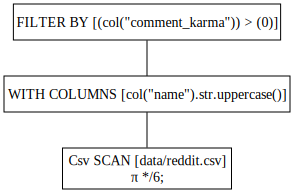

In [92]:
q1.show_graph(optimized=False)

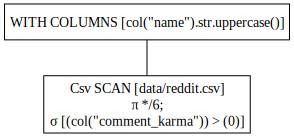

In [93]:
q1.show_graph(optimized=True)

In [94]:
q1.explain(optimized=False)

'FILTER [(col("comment_karma")) > (0)] FROM\n   WITH_COLUMNS:\n   [col("name").str.uppercase()] \n    Csv SCAN [data/reddit.csv]\n    PROJECT */6 COLUMNS'

## Ejecución de query
Si ejecutáramos el código siguiente en el archivo CSV de Reddit, la consulta no se evaluaría de inmediato. En lugar de eso, Polars toma cada línea de código, la agrega al grafo de consulta interno y optimiza dicho grafo.

Cuando ejecutamos el código, Polars ejecuta el grafo de consulta optimizado de manera predeterminada.

In [95]:
q1 = (
    pl.scan_csv("data/reddit.csv")
    .with_columns(pl.col("name").str.to_uppercase())
    .filter(pl.col("comment_karma") > 0)
)

### Ejecución en todo el dataset
Podemos ejecutar nuestra consulta en el conjunto de datos completo llamando al método .collect en la consulta.

In [96]:
q4 = (
    pl.scan_csv(f"data/reddit.csv")
    .with_columns(pl.col("name").str.to_uppercase())
    .filter(pl.col("comment_karma") > 0)
    .collect()
)

In [97]:
q4

id,name,created_utc,updated_on,comment_karma,link_karma
i64,str,i64,i64,i64,i64
6,"""TAOJIANLONG_JASONBROKEN""",1397113510,1536527864,4,0
17,"""SSAIG_JASONBROKEN""",1397113544,1536527864,1,0
19,"""FDBVFDSSDGFDS_JASONBROKEN""",1397113552,1536527864,3,0
37,"""IHATEWHOWEARE_JASONBROKEN""",1397113636,1536527864,61,0
77714,"""HOCKEYSCHTICK""",1137474000,1536497404,11104,451
…,…,…,…,…,…
77762,"""COOLIN86""",1138303196,1536528275,40,7
77763,"""LUNCHY""",1137599510,1536528275,65,0
77765,"""COMPOSTELLAS""",1137474000,1536528276,6,0


Con el método predeterminado .collect, Polars procesa todos tus datos como un solo lote. Esto significa que todos los datos deben caber en la memoria disponible en el punto de mayor uso de memoria durante la consulta.

Si tus datos requieren más memoria de la que tienes disponible, Polars puede procesar los datos en lotes utilizando el modo de streaming. Para usar el modo de streaming, simplemente debes pasar el argumento streaming=True al método .collect.

### Ejecución en datos parciales
Mientras escribes, optimizas o verificas tu consulta en un conjunto de datos grande, consultar todos los datos disponibles puede llevar a un proceso de desarrollo lento.

En su lugar, puedes ejecutar la consulta con el método .fetch. El método .fetch toma un parámetro n_rows e intenta “obtener” esa cantidad de filas de la fuente de datos. Sin embargo, el número de filas no puede garantizarse, ya que la API lazy no cuenta cuántas filas hay en cada etapa de la consulta.


In [98]:
q9 = (
    pl.scan_csv(f"data/reddit.csv")
    .with_columns(pl.col("name").str.to_uppercase())
    .filter(pl.col("comment_karma") > 0)
    .fetch(n_rows=int(100))
)
q9

/var/folders/tx/knx9c43n5fd4_nn752k9dxs00000gn/T/ipykernel_1961/595868360.py:5: DeprecationWarning: `LazyFrame.fetch` is deprecated. `LazyFrame.fetch` is deprecated; use `LazyFrame.collect` instead, in conjunction with a call to `head`.
  .fetch(n_rows=int(100))


id,name,created_utc,updated_on,comment_karma,link_karma
i64,str,i64,i64,i64,i64
6,"""TAOJIANLONG_JASONBROKEN""",1397113510,1536527864,4,0
17,"""SSAIG_JASONBROKEN""",1397113544,1536527864,1,0
19,"""FDBVFDSSDGFDS_JASONBROKEN""",1397113552,1536527864,3,0
37,"""IHATEWHOWEARE_JASONBROKEN""",1397113636,1536527864,61,0
77714,"""HOCKEYSCHTICK""",1137474000,1536497404,11104,451
…,…,…,…,…,…
77762,"""COOLIN86""",1138303196,1536528275,40,7
77763,"""LUNCHY""",1137599510,1536528275,65,0
77765,"""COMPOSTELLAS""",1137474000,1536528276,6,0


In [99]:
q9_2 = (
    pl.scan_csv(f"data/reddit.csv")
    .with_columns(pl.col("name").str.to_uppercase())
    .filter(pl.col("comment_karma") > 0)
    .collect()
    .head(100)
)
q9_2

id,name,created_utc,updated_on,comment_karma,link_karma
i64,str,i64,i64,i64,i64
6,"""TAOJIANLONG_JASONBROKEN""",1397113510,1536527864,4,0
17,"""SSAIG_JASONBROKEN""",1397113544,1536527864,1,0
19,"""FDBVFDSSDGFDS_JASONBROKEN""",1397113552,1536527864,3,0
37,"""IHATEWHOWEARE_JASONBROKEN""",1397113636,1536527864,61,0
77714,"""HOCKEYSCHTICK""",1137474000,1536497404,11104,451
…,…,…,…,…,…
77762,"""COOLIN86""",1138303196,1536528275,40,7
77763,"""LUNCHY""",1137599510,1536528275,65,0
77765,"""COMPOSTELLAS""",1137474000,1536528276,6,0


# IO
## csv

In [100]:
df = pl.read_csv("data/reddit.csv")

In [101]:
df = pl.DataFrame({"foo": [1, 2, 3], "bar": [None, "bak", "baz"]})
df.write_csv("data/ejemplo.csv")

In [102]:
df = pl.scan_csv("data/reddit.csv")

## Excel
Polars no tiene un lector nativo de archivos excel, los motores disponibles son:
* [xlsx2csv](https://github.com/dilshod/xlsx2csv): Este es el valor predeterminado actual.
* [openpyxl](https://openpyxl.readthedocs.io/en/stable/): Generalmente más lento que xls2csv, pero puede ofrecer más flexibilidad para archivos que son difíciles de analizar.
* [fastexcel](https://pypi.org/project/fastexcel/): Este lector está basado en [calamine](https://docs.rs/calamine/latest/calamine/) y suele ser el lector más rápido, pero tiene menos características que xls2csv.

Aunque fastexcel no es el valor predeterminado en este momento, se recomienda intentar usar fastexcel primero y recurrir a xlsx2csv o openpyxl si encuentras problemas.

Para utilizar uno de estos motores, el paquete de Python correspondiente debe estar instalado como una dependencia adicional.

In [103]:
archivo_excel = "data/ejemplo.xlsx"
df = pl.read_excel(archivo_excel) #esto creo que es con fastexcel (calamine) ahora y no xlsx2csv

In [104]:
%timeit pl.read_excel(archivo_excel)

257 ms ± 4.04 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [105]:
%timeit pl.read_excel(archivo_excel, engine="xlsx2csv")

2.3 s ± 118 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [106]:
%timeit pl.read_excel(archivo_excel, engine="openpyxl")

3.35 s ± 157 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [107]:
%timeit pl.read_excel(archivo_excel, engine="calamine")

253 ms ± 4.24 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [108]:
df

ID,FECHA,Resultado
i64,date,i64
220918,2007-10-14,45756347
8006374,1999-04-09,41813113
2569010,1990-08-25,-26451348
263755,1993-04-25,11464181
3161483,2019-09-28,-29730597
…,…,…
2845943,1997-09-17,-48793896
4792999,1991-01-08,74785351
9530846,2001-06-23,80838619


Para escribir excel se usa xlsxwriter

In [109]:
df = pl.DataFrame({"foo": [1, 2, 3], "bar": [None, "bak", "baz"]})
df.write_excel("data/salida.xlsx")

In [110]:
df.write_excel("data/salida2.xlsx")

## Parquet
Cargar o escribir archivos Parquet es extremadamente rápido, ya que la disposición de los datos en un DataFrame de Polars en memoria refleja la disposición de un archivo Parquet en el disco en muchos aspectos.

A diferencia de CSV, Parquet es un formato columnar. Esto significa que los datos se almacenan en columnas en lugar de filas. Esta forma de almacenamiento es más eficiente, ya que permite una mejor compresión y un acceso más rápido a los datos

In [111]:
df = pl.read_parquet("data/flights.parquet")

In [112]:
df.head()

FL_DATE,DEP_DELAY,ARR_DELAY,AIR_TIME,DISTANCE,DEP_TIME,ARR_TIME
date,i16,i16,i16,i16,f32,f32
2006-01-01,5,19,350,2475,9.083333,12.483334
2006-01-02,167,216,343,2475,11.783334,15.766666
2006-01-03,-7,-2,344,2475,8.883333,12.133333
2006-01-04,-5,-13,331,2475,8.916667,11.95
2006-01-05,-3,-17,321,2475,8.95,11.883333


In [113]:
df = pl.DataFrame({"foo": [1, 2, 3], "bar": [None, "bak", "baz"]})
df.write_parquet("data/ejemplo.parquet")

In [114]:
df = pl.scan_parquet("data/flights.parquet")

In [115]:
df

## JSON

In [116]:
json_file = "data/testjson.json"
df = pl.read_json(json_file)

In [117]:
df

name,language,id,bio,version
str,str,str,str,f64
"""Adeel Solangi""","""Sindhi""","""V59OF92YF627HFY0""","""Donec lobortis eleifend condim…",6.1
"""Afzal Ghaffar""","""Sindhi""","""ENTOCR13RSCLZ6KU""","""Aliquam sollicitudin ante ligu…",1.88
"""Aamir Solangi""","""Sindhi""","""IAKPO3R4761JDRVG""","""Vestibulum pharetra libero et …",7.27
"""Abla Dilmurat""","""Uyghur""","""5ZVOEPMJUI4MB4EN""","""Donec lobortis eleifend condim…",2.53
"""Adil Eli""","""Uyghur""","""6VTI8X6LL0MMPJCC""","""Vivamus id faucibus velit, id …",6.49
…,…,…,…,…
"""Bhupesh Menon""","""Hindi""","""0CEPNRDV98KT3ORP""","""Maecenas tempus neque ut portt…",2.69
"""Rohini Vasav""","""Hindi""","""UEFML43TCGS04KWM""","""Ut accumsan, est vel fringilla…",9.3
"""Sunil Kapoor""","""Hindi""","""VY2A0APGVHK5NAW2""","""Proin tempus eu risus nec matt…",8.04


In [118]:
ndjson_file = "data/ndjson-sample.json"
df = pl.read_ndjson(ndjson_file) # 
df

url,result
str,struct[4]
"""https://www.yelp.com/search?fi…","{{""https://www.yelp.com/search?find_desc=Desserts&find_loc=San+Jose,+CA&start=0"",[{[{[{""https://www.yelp.com/biz/milk-and-wood-san-jose?osq=Desserts"",""Milk & Wood""}]}, {[{""https://www.yelp.com/biz/dzuis-cakes-and-desserts-san-jose?osq=Desserts"",""Dzui’s Cakes & Desserts""}]}, … {[{""https://www.yelp.com/biz/anton-sv-p%C3%A2tisserie-san-jose-2?osq=Desserts"",""Anton SV Pâtisserie""}]}]}]},{200,1513286383006},1513286383006,0}"
"""https://www.yelp.com/search?fi…","{{""https://www.yelp.com/search?find_desc=Desserts&find_loc=San+Jose,+CA&start=10"",[{[{[{""https://www.yelp.com/biz/oooh-san-jose-4?osq=Desserts"",""Oooh""}]}, {[{""https://www.yelp.com/biz/hannah-san-jose?osq=Desserts"",""Hannah""}]}, … {[{""https://www.yelp.com/biz/blackball-desserts-san-jose-san-jose?osq=Desserts"",""BlackBall Desserts San Jose""}]}]}]},{200,1513286384917},1513286384917,1}"
"""https://www.yelp.com/search?fi…","{{""https://www.yelp.com/search?find_desc=Desserts&find_loc=San+Jose,+CA&start=20"",[{[{[{""https://www.yelp.com/biz/anton-sv-p%C3%A2tisserie-san-jose-2?osq=Desserts"",""Anton SV Pâtisserie""}]}, {[{""https://www.yelp.com/biz/soyful-desserts-san-jose-8?osq=Desserts"",""Soyful Desserts""}]}, … {[{""https://www.yelp.com/biz/j-sweets-san-jose-3?osq=Desserts"",""J.Sweets""}]}]}]},{200,1513286395948},1513286395948,2}"
"""https://www.yelp.com/search?fi…","{{""https://www.yelp.com/search?find_desc=Desserts&find_loc=San+Jose,+CA&start=30"",[{[{[{""https://www.yelp.com/biz/treatbot-san-jose-2?osq=Desserts"",""Treatbot""}]}, {[{""https://www.yelp.com/biz/cream-san-jose?osq=Desserts"",""CREAM""}]}, … {[{""https://www.yelp.com/biz/san-jose-tofu-company-san-jose?osq=Desserts"",""San Jose Tofu Company""}]}]}]},{200,1513286386420},1513286386420,3}"
"""https://www.yelp.com/search?fi…","{{""https://www.yelp.com/search?find_desc=Desserts&find_loc=San+Jose,+CA&start=40"",[{[{[{""https://www.yelp.com/biz/the-sweet-corner-san-jose?osq=Desserts"",""The Sweet Corner""}]}, {[{""https://www.yelp.com/biz/marco-polo-italian-ice-cream-san-jose-4?osq=Desserts"",""Marco Polo Italian Ice Cream""}]}, … {[{""https://www.yelp.com/biz/la-original-paleteria-y-neveria-san-jose?osq=Desserts"",""La Original Paleteria Y Neveria""}]}]}]},{200,1513286387763},1513286387763,4}"


In [119]:
df = pl.DataFrame({"foo": [1, 2, 3], "bar": [None, "bak", "baz"]})
df.write_json("data/prueba.json")

In [120]:
df = pl.scan_ndjson(ndjson_file) # SOLO PARA NDJSON

In [121]:
df

## Multiple files

In [122]:
# creando archivos
for i in range(10):
    archivo = f"data/test_csv{i}.csv"
    df = pl.DataFrame({"foo": [1*(i+1), 2*(i+1), 3*(i+1)], "bar": [None, "bak", "baz"]})
    df.write_csv(archivo)

In [123]:
df = pl.read_csv("data/test_csv*.csv")
print(df)

shape: (30, 2)
┌─────┬──────┐
│ foo ┆ bar  │
│ --- ┆ ---  │
│ i64 ┆ str  │
╞═════╪══════╡
│ 1   ┆ null │
│ 2   ┆ bak  │
│ 3   ┆ baz  │
│ 2   ┆ null │
│ 4   ┆ bak  │
│ …   ┆ …    │
│ 18  ┆ bak  │
│ 27  ┆ baz  │
│ 10  ┆ null │
│ 20  ┆ bak  │
│ 30  ┆ baz  │
└─────┴──────┘


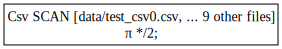

In [124]:
pl.scan_csv("data/test_csv*.csv").show_graph()

### Leyendo en paralelo

In [125]:
import glob

import polars as pl

queries = []
for file in glob.glob("data/test_csv*.csv"):
    q = pl.scan_csv(file).group_by("bar").agg(pl.len(), pl.sum("foo"))
    queries.append(q)

dataframes = pl.collect_all(queries)
print(dataframes)

[shape: (3, 3)
┌──────┬─────┬─────┐
│ bar  ┆ len ┆ foo │
│ ---  ┆ --- ┆ --- │
│ str  ┆ u32 ┆ i64 │
╞══════╪═════╪═════╡
│ null ┆ 1   ┆ 1   │
│ bak  ┆ 1   ┆ 2   │
│ baz  ┆ 1   ┆ 3   │
└──────┴─────┴─────┘, shape: (3, 3)
┌──────┬─────┬─────┐
│ bar  ┆ len ┆ foo │
│ ---  ┆ --- ┆ --- │
│ str  ┆ u32 ┆ i64 │
╞══════╪═════╪═════╡
│ null ┆ 1   ┆ 2   │
│ bak  ┆ 1   ┆ 4   │
│ baz  ┆ 1   ┆ 6   │
└──────┴─────┴─────┘, shape: (3, 3)
┌──────┬─────┬─────┐
│ bar  ┆ len ┆ foo │
│ ---  ┆ --- ┆ --- │
│ str  ┆ u32 ┆ i64 │
╞══════╪═════╪═════╡
│ baz  ┆ 1   ┆ 12  │
│ bak  ┆ 1   ┆ 8   │
│ null ┆ 1   ┆ 4   │
└──────┴─────┴─────┘, shape: (3, 3)
┌──────┬─────┬─────┐
│ bar  ┆ len ┆ foo │
│ ---  ┆ --- ┆ --- │
│ str  ┆ u32 ┆ i64 │
╞══════╪═════╪═════╡
│ bak  ┆ 1   ┆ 6   │
│ null ┆ 1   ┆ 3   │
│ baz  ┆ 1   ┆ 9   │
└──────┴─────┴─────┘, shape: (3, 3)
┌──────┬─────┬─────┐
│ bar  ┆ len ┆ foo │
│ ---  ┆ --- ┆ --- │
│ str  ┆ u32 ┆ i64 │
╞══════╪═════╪═════╡
│ baz  ┆ 1   ┆ 21  │
│ bak  ┆ 1   ┆ 14  │
│ null ┆ 1   ┆ 7   │
└

Si los archivos no necesitan estar en una sola tabla, se puede construir un plan de consulta para cada archivo y ejecutarlos en paralelo en el pool de hilos de Polars.

Toda la ejecución del plan de consulta es altamente paralela y no requiere ninguna comunicación entre los procesos.

## Otros formatos
* https://docs.pola.rs/user-guide/io/hive/
* https://docs.pola.rs/user-guide/io/database/
* https://docs.pola.rs/user-guide/io/cloud-storage/
* https://docs.pola.rs/user-guide/io/bigquery/
* https://docs.pola.rs/user-guide/io/hugging-face/

## SQL

Polars utiliza el objeto SQLContext para gestionar consultas SQL. El contexto contiene un mapeo de nombres de identificadores de DataFrame y LazyFrame a sus conjuntos de datos correspondientes. El ejemplo a continuación inicia un SQLContext:

In [126]:
ctx = pl.SQLContext()

In [127]:
df = pl.DataFrame({"a": [1, 2, 3]})
lf = pl.LazyFrame({"b": [4, 5, 6]})

# Register all dataframes in the global namespace: registers both "df" and "lf"
ctx = pl.SQLContext(register_globals=True)

# Register an explicit mapping of identifier name to frame
ctx = pl.SQLContext(frames={"table_one": df, "table_two": lf})

# Register frames using kwargs; dataframe df as "df" and lazyframe lf as "lf"
ctx = pl.SQLContext(df=df, lf=lf)

In [128]:
ctx

<SQLContext [tables:2] at 0x167043fb0>

In [129]:
import pandas as pd

df_pandas = pd.DataFrame({"c": [7, 8, 9]})
ctx = pl.SQLContext(df_pandas=pl.from_pandas(df_pandas))

In [130]:
ctx

<SQLContext [tables:1] at 0x11f9c3350>

In [131]:
# For local files use scan_csv instead
pokemon = pl.read_csv(
    "https://gist.githubusercontent.com/ritchie46/cac6b337ea52281aa23c049250a4ff03/raw/89a957ff3919d90e6ef2d34235e6bf22304f3366/pokemon.csv"
)
with pl.SQLContext(register_globals=True, eager=True) as ctx:
    df_small = ctx.execute("SELECT * from pokemon LIMIT 5")
    print(df_small)

shape: (5, 13)
┌─────┬───────────────────────┬────────┬────────┬───┬─────────┬───────┬────────────┬───────────┐
│ #   ┆ Name                  ┆ Type 1 ┆ Type 2 ┆ … ┆ Sp. Def ┆ Speed ┆ Generation ┆ Legendary │
│ --- ┆ ---                   ┆ ---    ┆ ---    ┆   ┆ ---     ┆ ---   ┆ ---        ┆ ---       │
│ i64 ┆ str                   ┆ str    ┆ str    ┆   ┆ i64     ┆ i64   ┆ i64        ┆ bool      │
╞═════╪═══════════════════════╪════════╪════════╪═══╪═════════╪═══════╪════════════╪═══════════╡
│ 1   ┆ Bulbasaur             ┆ Grass  ┆ Poison ┆ … ┆ 65      ┆ 45    ┆ 1          ┆ false     │
│ 2   ┆ Ivysaur               ┆ Grass  ┆ Poison ┆ … ┆ 80      ┆ 60    ┆ 1          ┆ false     │
│ 3   ┆ Venusaur              ┆ Grass  ┆ Poison ┆ … ┆ 100     ┆ 80    ┆ 1          ┆ false     │
│ 3   ┆ VenusaurMega Venusaur ┆ Grass  ┆ Poison ┆ … ┆ 120     ┆ 80    ┆ 1          ┆ false     │
│ 4   ┆ Charmander            ┆ Fire   ┆ null   ┆ … ┆ 50      ┆ 65    ┆ 1          ┆ false     │
└─────┴────────

### Multiples fuentes
Ejemplo en https://docs.pola.rs/user-guide/sql/intro/#execute-queries-from-multiple-sources

### SHOW TABLES

In [132]:
# Create some DataFrames and register them with the SQLContext
df1 = pl.LazyFrame(
    {
        "name": ["Alice", "Bob", "Charlie", "David"],
        "age": [25, 30, 35, 40],
    }
)
df2 = pl.LazyFrame(
    {
        "name": ["Ellen", "Frank", "Gina", "Henry"],
        "age": [45, 50, 55, 60],
    }
)
ctx = pl.SQLContext(mytable1=df1, mytable2=df2)

tables = ctx.execute("SHOW TABLES", eager=True)

print(tables)

shape: (2, 1)
┌──────────┐
│ name     │
│ ---      │
│ str      │
╞══════════╡
│ mytable1 │
│ mytable2 │
└──────────┘


### SELECT

In [133]:
df = pl.DataFrame(
    {
        "city": [
            "New York",
            "Los Angeles",
            "Chicago",
            "Houston",
            "Phoenix",
            "Amsterdam",
        ],
        "country": ["USA", "USA", "USA", "USA", "USA", "Netherlands"],
        "population": [8399000, 3997000, 2705000, 2320000, 1680000, 900000],
    }
)

ctx = pl.SQLContext(population=df, eager=True)

print(ctx.execute("SELECT * FROM population"))

shape: (6, 3)
┌─────────────┬─────────────┬────────────┐
│ city        ┆ country     ┆ population │
│ ---         ┆ ---         ┆ ---        │
│ str         ┆ str         ┆ i64        │
╞═════════════╪═════════════╪════════════╡
│ New York    ┆ USA         ┆ 8399000    │
│ Los Angeles ┆ USA         ┆ 3997000    │
│ Chicago     ┆ USA         ┆ 2705000    │
│ Houston     ┆ USA         ┆ 2320000    │
│ Phoenix     ┆ USA         ┆ 1680000    │
│ Amsterdam   ┆ Netherlands ┆ 900000     │
└─────────────┴─────────────┴────────────┘


In [134]:
result = ctx.execute(
    """
        SELECT country, AVG(population) as avg_population
        FROM population
        GROUP BY country
    """
)
print(result)

shape: (2, 2)
┌─────────────┬────────────────┐
│ country     ┆ avg_population │
│ ---         ┆ ---            │
│ str         ┆ f64            │
╞═════════════╪════════════════╡
│ Netherlands ┆ 900000.0       │
│ USA         ┆ 3.8202e6       │
└─────────────┴────────────────┘


In [135]:
result = ctx.execute(
    """
        SELECT city, population
        FROM population
        ORDER BY population
    """
)
print(result)

shape: (6, 2)
┌─────────────┬────────────┐
│ city        ┆ population │
│ ---         ┆ ---        │
│ str         ┆ i64        │
╞═════════════╪════════════╡
│ Amsterdam   ┆ 900000     │
│ Phoenix     ┆ 1680000    │
│ Houston     ┆ 2320000    │
│ Chicago     ┆ 2705000    │
│ Los Angeles ┆ 3997000    │
│ New York    ┆ 8399000    │
└─────────────┴────────────┘


In [136]:
income = pl.DataFrame(
    {
        "city": [
            "New York",
            "Los Angeles",
            "Chicago",
            "Houston",
            "Amsterdam",
            "Rotterdam",
            "Utrecht",
        ],
        "country": [
            "USA",
            "USA",
            "USA",
            "USA",
            "Netherlands",
            "Netherlands",
            "Netherlands",
        ],
        "income": [55000, 62000, 48000, 52000, 42000, 38000, 41000],
    }
)
ctx.register_many(income=income)
result = ctx.execute(
    """
        SELECT country, city, income, population
        FROM population
        LEFT JOIN income on population.city = income.city
    """
)
print(result)

shape: (6, 4)
┌─────────────┬─────────────┬────────┬────────────┐
│ country     ┆ city        ┆ income ┆ population │
│ ---         ┆ ---         ┆ ---    ┆ ---        │
│ str         ┆ str         ┆ i64    ┆ i64        │
╞═════════════╪═════════════╪════════╪════════════╡
│ USA         ┆ New York    ┆ 55000  ┆ 8399000    │
│ USA         ┆ Los Angeles ┆ 62000  ┆ 3997000    │
│ USA         ┆ Chicago     ┆ 48000  ┆ 2705000    │
│ USA         ┆ Houston     ┆ 52000  ┆ 2320000    │
│ USA         ┆ Phoenix     ┆ null   ┆ 1680000    │
│ Netherlands ┆ Amsterdam   ┆ 42000  ┆ 900000     │
└─────────────┴─────────────┴────────┴────────────┘


### FUNCIONES
Lista en https://docs.rs/polars-sql/latest/src/polars_sql/keywords.rs.html

In [137]:
result = ctx.execute(
    """
        SELECT city, population
        FROM population
        WHERE STARTS_WITH(country,'U')
    """
)
print(result)

shape: (5, 2)
┌─────────────┬────────────┐
│ city        ┆ population │
│ ---         ┆ ---        │
│ str         ┆ i64        │
╞═════════════╪════════════╡
│ New York    ┆ 8399000    │
│ Los Angeles ┆ 3997000    │
│ Chicago     ┆ 2705000    │
│ Houston     ┆ 2320000    │
│ Phoenix     ┆ 1680000    │
└─────────────┴────────────┘


In [138]:
result = ctx.execute(
    """
        SELECT *
        FROM read_csv('iris/iris.csv')
    """
)
print(result)

shape: (150, 5)
┌──────────────┬─────────────┬──────────────┬─────────────┬───────────┐
│ sepal.length ┆ sepal.width ┆ petal.length ┆ petal.width ┆ variety   │
│ ---          ┆ ---         ┆ ---          ┆ ---         ┆ ---       │
│ f64          ┆ f64         ┆ f64          ┆ f64         ┆ str       │
╞══════════════╪═════════════╪══════════════╪═════════════╪═══════════╡
│ 5.1          ┆ 3.5         ┆ 1.4          ┆ 0.2         ┆ Setosa    │
│ 4.9          ┆ 3.0         ┆ 1.4          ┆ 0.2         ┆ Setosa    │
│ 4.7          ┆ 3.2         ┆ 1.3          ┆ 0.2         ┆ Setosa    │
│ 4.6          ┆ 3.1         ┆ 1.5          ┆ 0.2         ┆ Setosa    │
│ 5.0          ┆ 3.6         ┆ 1.4          ┆ 0.2         ┆ Setosa    │
│ …            ┆ …           ┆ …            ┆ …           ┆ …         │
│ 6.7          ┆ 3.0         ┆ 5.2          ┆ 2.3         ┆ Virginica │
│ 6.3          ┆ 2.5         ┆ 5.0          ┆ 1.9         ┆ Virginica │
│ 6.5          ┆ 3.0         ┆ 5.2          ┆ 2.

### CREATE TABLE

In [139]:
data = {"name": ["Alice", "Bob", "Charlie", "David"], "age": [25, 30, 35, 40]}
df = pl.LazyFrame(data)

ctx = pl.SQLContext(my_table=df, eager=True)

result = ctx.execute(
    """
    CREATE TABLE older_people
    AS
    SELECT * FROM my_table WHERE age > 30
"""
)

print(ctx.execute("SELECT * FROM older_people"))

shape: (2, 2)
┌─────────┬─────┐
│ name    ┆ age │
│ ---     ┆ --- │
│ str     ┆ i64 │
╞═════════╪═════╡
│ Charlie ┆ 35  │
│ David   ┆ 40  │
└─────────┴─────┘


### Common Table Expresions
Las Expresiones de Tabla Comunes (CTEs, por sus siglas en inglés) son una característica de SQL que te permiten definir un conjunto de resultados temporal con nombre, que puede ser referenciado dentro de una declaración SQL. Las CTEs proporcionan una manera de desglosar consultas SQL complejas en partes más pequeñas y manejables, lo que facilita su lectura, escritura y mantenimiento.

Una CTE se define utilizando la palabra clave WITH, seguida de una lista separada por comas de subconsultas, cada una de las cuales define un conjunto de resultados con nombre que puede ser utilizado en consultas posteriores. La sintaxis para una CTE es la siguiente:

In [140]:
ctx = pl.SQLContext()
df = pl.LazyFrame(
    {"name": ["Alice", "Bob", "Charlie", "David"], "age": [25, 30, 35, 40]}
)
ctx.register("my_table", df)

result = ctx.execute(
    """
    WITH older_people AS (
        SELECT * FROM my_table WHERE age > 30
    )
    SELECT * FROM older_people WHERE STARTS_WITH(name,'C')
""",
    eager=True,
)

print(result)

shape: (1, 2)
┌─────────┬─────┐
│ name    ┆ age │
│ ---     ┆ --- │
│ str     ┆ i64 │
╞═════════╪═════╡
│ Charlie ┆ 35  │
└─────────┴─────┘


# Visualización

In [141]:
import polars as pl

path = "iris/iris.csv"

df = pl.scan_csv(path).group_by("variety").agg(pl.col("petal.length").mean()).collect()
print(df)

shape: (3, 2)
┌────────────┬──────────────┐
│ variety    ┆ petal.length │
│ ---        ┆ ---          │
│ str        ┆ f64          │
╞════════════╪══════════════╡
│ Setosa     ┆ 1.462        │
│ Versicolor ┆ 4.26         │
│ Virginica  ┆ 5.552        │
└────────────┴──────────────┘


In [142]:
df.plot.bar(
    x="variety",
    y="petal.length",
    width=650,
)

:Bars   [variety]   (petal.length)

<BarContainer object of 3 artists>

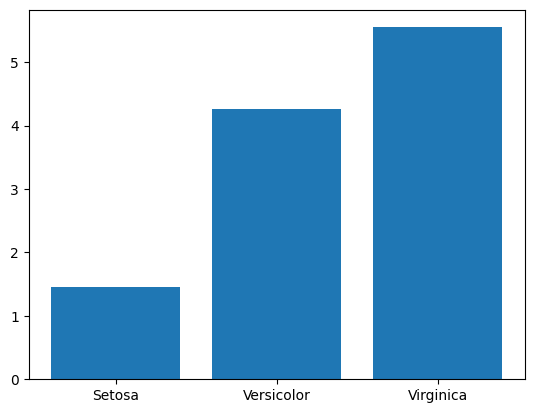

In [143]:
import matplotlib.pyplot as plt

plt.bar(x=df["variety"], height=df["petal.length"])

# Styling

In [144]:
import polars as pl
import polars.selectors as cs

path = "iris/iris.csv"

df = (
    pl.scan_csv(path)
    .group_by("variety")
    .agg(cs.starts_with("petal").mean().round(3))
    .collect()
)
print(df)

shape: (3, 3)
┌────────────┬──────────────┬─────────────┐
│ variety    ┆ petal.length ┆ petal.width │
│ ---        ┆ ---          ┆ ---         │
│ str        ┆ f64          ┆ f64         │
╞════════════╪══════════════╪═════════════╡
│ Virginica  ┆ 5.552        ┆ 2.026       │
│ Setosa     ┆ 1.462        ┆ 0.246       │
│ Versicolor ┆ 4.26         ┆ 1.326       │
└────────────┴──────────────┴─────────────┘


In [145]:
# Si uno baja great_tables puede hacer esto
df.style.tab_header(title="Iris Data", subtitle="Mean measurement values per species")

GT(_tbl_data=shape: (3, 3)
┌────────────┬──────────────┬─────────────┐
│ variety    ┆ petal.length ┆ petal.width │
│ ---        ┆ ---          ┆ ---         │
│ str        ┆ f64          ┆ f64         │
╞════════════╪══════════════╪═════════════╡
│ Virginica  ┆ 5.552        ┆ 2.026       │
│ Setosa     ┆ 1.462        ┆ 0.246       │
│ Versicolor ┆ 4.26         ┆ 1.326       │
└────────────┴──────────────┴─────────────┘, _body=<great_tables._gt_data.Body object at 0x15cc00350>, _boxhead=Boxhead([ColInfo(var='variety', type=<ColInfoTypeEnum.default: 1>, column_label='variety', column_align='left', column_width=None), ColInfo(var='petal.length', type=<ColInfoTypeEnum.default: 1>, column_label='petal.length', column_align='right', column_width=None), ColInfo(var='petal.width', type=<ColInfoTypeEnum.default: 1>, column_label='petal.width', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x15cbf04a0>, _spanners=Spanners([]), _heading=Heading(title='Iris Data', subtitle='Mean measurement values per species', preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x15cb776b0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), heading_background_color=OptionsInfo(scss=True, category='heading', type='value', value=None), heading_align=OptionsInfo(scss=True, category='h

In [146]:
from great_tables import loc, style

df.style.tab_style(
    style.fill("yellow"),
    loc.body(
        rows=pl.col("petal.length") == pl.col("petal.length").max(),
    ),
)

variety,petal.length,petal.width
Virginica,5.552,2.026
Setosa,1.462,0.246
Versicolor,4.26,1.326


In [147]:
from great_tables import loc, style

df.style.tab_style(
    style.text(weight="bold"),
    loc.body(columns="variety"),
)

variety,petal.length,petal.width
Virginica,5.552,2.026
Setosa,1.462,0.246
Versicolor,4.26,1.326


In [148]:
df

variety,petal.length,petal.width
str,f64,f64
"""Virginica""",5.552,2.026
"""Setosa""",1.462,0.246
"""Versicolor""",4.26,1.326
